# Import Required Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [39]:
airlinedata=pd.read_csv('/content/Airline data set.csv')

# Explore Dataset

In [40]:
airlinedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [41]:
## Check for wrong or unrealistic entry

for i in airlinedata.iloc[:,2:].columns:
    print(airlinedata[i].value_counts())
    print('='*25)

Gender
Female    52727
Male      51177
Name: count, dtype: int64
Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64
Age
39    2969
25    2798
40    2574
44    2482
42    2457
      ... 
74      47
76      45
79      42
78      33
85      17
Name: count, Length: 75, dtype: int64
Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64
Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64
Flight Distance
337     660
594     395
404     392
2475    369
862     369
       ... 
1094      1
1219      1
974       1
1479      1
400       1
Name: count, Length: 3802, dtype: int64
Inflight wifi service
3    25868
2    25830
4    19794
1    17840
5    11469
0     3103
Name: count, dtype: int64
Departure/Arrival time convenient
4    25546
5    22403
3    17966
2    17191
1    15498
0     5300
Name: count, dtype: int64
Ease of Online booking
3    24449
2    24021
4    19571
1    17525
5    1

In [42]:
airlinedata.isnull().sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [43]:
airlinedata.shape

(103904, 25)

In [44]:
airlinedata['id'].value_counts().sum()

## value counts or unique counts of 'id' column is same as number of records, it means there is no duplicate 'id'.

np.int64(103904)

All the data types are correctly allocated except 'Arrival Delay in Minutes' Col. which is in float64, 310 Null Values in 'Arrival Delay in minutes' column, No duplicate in 'id' column, and No mismatch values in dataset.

# Data Cleaning and Modifications





In [45]:
airlinedata.drop('Unnamed: 0', axis=1, inplace=True)
airlinedata.dropna(inplace=True)
airlinedata.isnull().sum()

,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0


In [46]:
airlinedata['Arrival Delay in Minutes']=airlinedata['Arrival Delay in Minutes'].astype('int64')
airlinedata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   id                                 103594 non-null  int64 
 1   Gender                             103594 non-null  object
 2   Customer Type                      103594 non-null  object
 3   Age                                103594 non-null  int64 
 4   Type of Travel                     103594 non-null  object
 5   Class                              103594 non-null  object
 6   Flight Distance                    103594 non-null  int64 
 7   Inflight wifi service              103594 non-null  int64 
 8   Departure/Arrival time convenient  103594 non-null  int64 
 9   Ease of Online booking             103594 non-null  int64 
 10  Gate location                      103594 non-null  int64 
 11  Food and drink                     103594 non-null  int64

# Removing Outliers

In [47]:
airlinedata.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,64942.428625,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,37460.816597,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32562.250000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64890.000000,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97370.500000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


1. Here in 'Age' Column min. age is 7, Which is too small to give a authentic Rating about the airline. So, Make minimun age which should be consider for eligibility to rate the airline is 16.
2. In columns 'Departure Delay in Minutes' and 'Arrival Delay in Minutes' Outliers are present. Remove by Using IQR Method.

In [48]:
## Select Passengers of age equal to 16 or more than 16.

airlinedata=airlinedata[airlinedata['Age']>=16]

In [49]:
## IQR Method to remove outliers of Departure delay and Arrival delay (Because data is skewedly distributed)

## Lower and Upper fence range of Departure delay
q1_of_departure=np.percentile(airlinedata['Departure Delay in Minutes'],25)
q3_of_departure=np.percentile(airlinedata['Departure Delay in Minutes'],75)
iqr_of_departure=q3_of_departure-q1_of_departure
lower_fence_of_departure_delay=q1_of_departure-(1.5*iqr_of_departure)
upper_fence_of_departure_delay=q3_of_departure+(1.5*iqr_of_departure)

## Lower and Upper fence range of Arrival delay
q1_of_arrival=np.percentile(airlinedata['Arrival Delay in Minutes'],25)
q3_of_arrival=np.percentile(airlinedata['Arrival Delay in Minutes'],75)
iqr_of_arrival=q3_of_arrival-q1_of_arrival
lower_fence_of_arrival_delay=q1_of_arrival-(1.5*iqr_of_arrival)
upper_fence_of_arrival_delay=q3_of_arrival+(1.5*iqr_of_arrival)

## Remove Outliers (Outside the Lower and Upper fence range)
airlinedata=airlinedata[airlinedata['Departure Delay in Minutes']>lower_fence_of_departure_delay]
airlinedata=airlinedata[airlinedata['Departure Delay in Minutes']<upper_fence_of_departure_delay]
airlinedata=airlinedata[airlinedata['Arrival Delay in Minutes']>lower_fence_of_arrival_delay]
airlinedata=airlinedata[airlinedata['Arrival Delay in Minutes']<upper_fence_of_arrival_delay]

In [50]:
airlinedata.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,81696.000000,81696.000000,81696.000000,81696.000000,81696.000000,81696.000000,81696.000000,81696.000000,81696.000000,81696.000000,81696.000000,81696.000000,81696.000000,81696.000000,81696.000000,81696.000000,81696.000000,81696.000000,81696.000000
mean,65330.412028,41.163386,1208.070824,2.751971,3.040308,2.772645,2.976816,3.229509,3.308938,3.485789,3.395503,3.412750,3.363849,3.637669,3.325255,3.659261,3.315132,3.348487,3.457562
std,37316.753304,13.781015,1011.729849,1.346778,1.531273,1.408303,1.286053,1.323849,1.342903,1.306279,1.326422,1.284482,1.316008,1.188082,1.260614,1.176342,1.304997,6.541455,6.685209
min,1.000000,16.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,33098.750000,29.000000,409.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,65483.500000,41.000000,853.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97024.250000,52.000000,1773.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,3.000000,4.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,29.000000,32.000000


In [51]:
airlinedata.head(5)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0,satisfied
5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,...,1,3,4,4,4,4,1,0,0,neutral or dissatisfied


Now the data is good to go.
# Data Analysis and Findings

In [52]:
airlinedata.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [53]:
satisfaction=round(airlinedata['satisfaction'].value_counts(normalize=True)*100,2)
print('Satisfaction or Dissatisfaction among the passengers',satisfaction)

Satisfaction or Dissatisfaction among the passengers satisfaction
neutral or dissatisfied    53.42
satisfied                  46.58
Name: proportion, dtype: float64


Here, around 53% Passenegers are neutral or dissatisfied

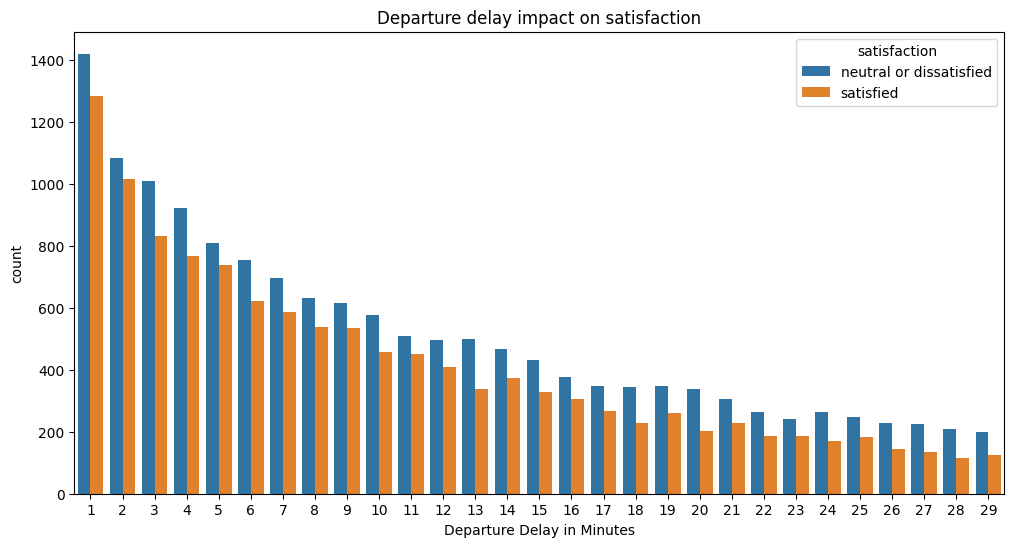

In [54]:
## Departure delay impact on satisfaction of the passengers

plt.figure(figsize=(12,6))
sns.countplot(data=airlinedata[airlinedata['Departure Delay in Minutes']>0], x='Departure Delay in Minutes', hue='satisfaction')
plt.title('Departure delay impact on satisfaction')
plt.show()

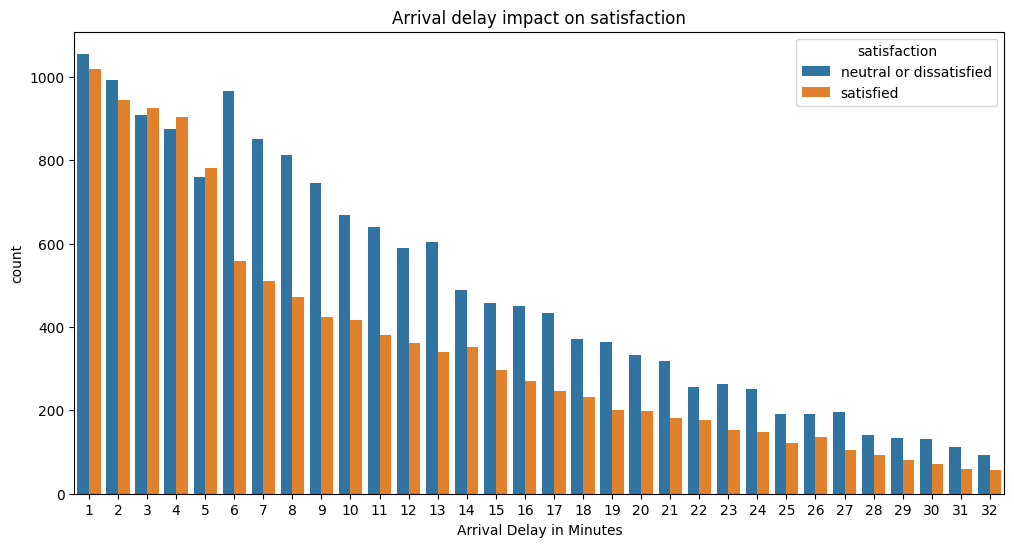

In [55]:
## Arrival delay time impact on satisfaction of the passengers

plt.figure(figsize=(12,6))
sns.countplot(data=airlinedata[airlinedata['Arrival Delay in Minutes']>0], x='Arrival Delay in Minutes', hue='satisfaction')
plt.title('Arrival delay impact on satisfaction')
plt.show()

Here, we clearly see that impact of departure delay is not much, but impact of arrival delay specially after delay of more than 5 minutes are really concerning.

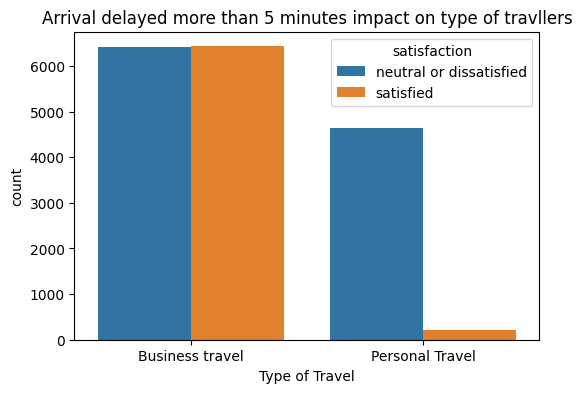

In [56]:
## Arrival delay impact on type of travllers

plt.figure(figsize=(6,4))
sns.countplot(data=airlinedata[airlinedata['Arrival Delay in Minutes']>5], x='Type of Travel', hue='satisfaction')
plt.title('Arrival delayed more than 5 minutes impact on type of travllers')
plt.show()

Here in this graph more than 90% of personal travllers are dissatisfied by the delay in arrival time, although business travellers are in around 50-50 ratio of satisfaction.

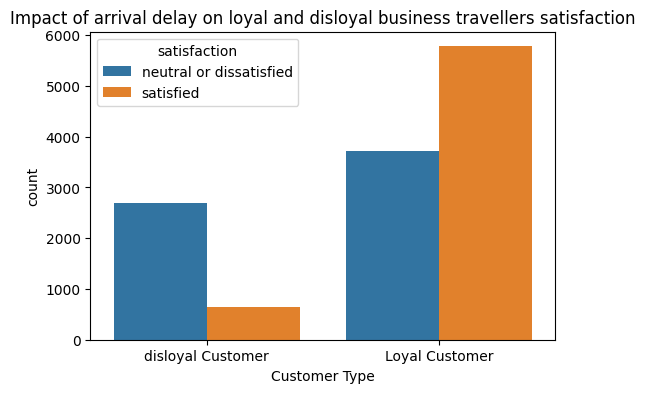

In [57]:
## Impact of arrival delay on loyal and disloyal Business travellers satisfaction.

plt.figure(figsize=(6,4))
sns.countplot(data=airlinedata[(airlinedata['Arrival Delay in Minutes']>5) & (airlinedata['Type of Travel']=='Business travel')], x='Customer Type', hue='satisfaction')
plt.title('Impact of arrival delay on loyal and disloyal business travellers satisfaction')
plt.show()

In this graph around 75% of disloyal business travellers are dissatisfied by the delay in arrival, although moslty loyal business travellers are satisfied after the delay in arrival but loyal those who are dissatisfied are more than disloyal those who are dissatisfied in terms of numbers.

### Finding 1:

### By the above data analysis we find that, delay in departure have not much impact on satisfaction of the passengers, but passengers who face delay in arrival are moslty dissatisfied Specially after 5 minutes of delay.

### It look like delay in arrival definitely impact on the satisfaction of the travellers, rest other factors will be consider.

In [58]:
## Amenities with 0 rating means no service provided

## Inflight wifi service not available ( 0 rating means no wifi service )

no_wifi=airlinedata[airlinedata['Inflight wifi service']==0]

## Online booking service not available ( 0 rating means no Online booking service )

no_online_booking=airlinedata[airlinedata['Ease of Online booking']==0]

## Online boarding service not available ( 0 rating means no Online boarding service )

no_online_boarding=airlinedata[airlinedata['Online boarding']==0]

Passengers report NO wifi
Total       2633
-------------------------
Ratio of Class passengers who report no wifi
Class
Business    4.15
Eco         2.19
Eco Plus    2.89
Name: count, dtype: float64
-------------------------


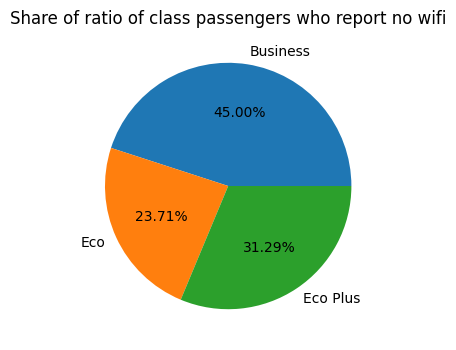

In [59]:
## Inflight wifi service not available by class

print('Passengers report NO wifi')
print('Total','     ',no_wifi.count()['Inflight wifi service'])
print('-'*25)
print('Ratio of Class passengers who report no wifi')
print(round(no_wifi['Class'].value_counts()/airlinedata['Class'].value_counts()*100,2) )
print('-'*25)
plt.figure(figsize=(4,4))
plt.pie(x=no_wifi['Class'].value_counts()/airlinedata['Class'].value_counts(), labels=['Business','Eco','Eco Plus'], autopct='%1.2f%%')
plt.title('Share of ratio of class passengers who report no wifi')
plt.show()

Business class with highest share of ratio of passengers who report no wifi out of total passengers.

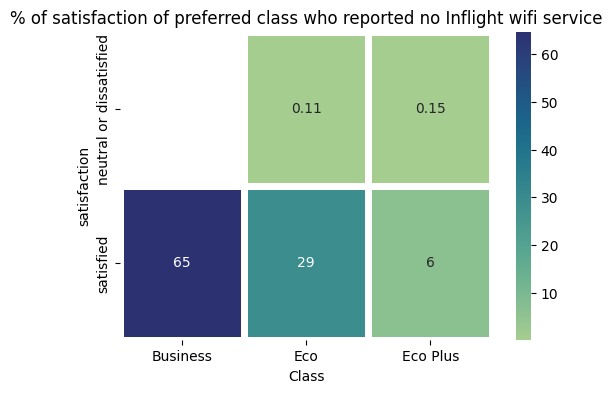

In [60]:
### Pivot table of those preferred Class who report no Inflight wifi service

pt_no_wifi=airlinedata[airlinedata['Inflight wifi service']==0].pivot_table(values='Inflight wifi service', index='satisfaction', columns='Class', aggfunc='count')
pt_no_wifi=round(pt_no_wifi/airlinedata[airlinedata['Inflight wifi service']==0]['Inflight wifi service'].count()*100,2)

## Heat map of pt_no_wifi

plt.figure(figsize=(6,4))
sns.heatmap(data=pt_no_wifi, annot=True, linewidths=5, cmap='crest')
plt.title('% of satisfaction of preferred class who reported no Inflight wifi service')
plt.show()

Here, whether the passengers are from business or eco or eco plus class, there satisfaction may not effected by the inflight wifi service unavailablity.

Passengers report NO Online booking service
Total       3588
-------------------------
Ratio of Type of travellers who report No Online booking
Type of Travel
Business travel    3.87
Personal Travel    5.72
Name: count, dtype: float64
-------------------------


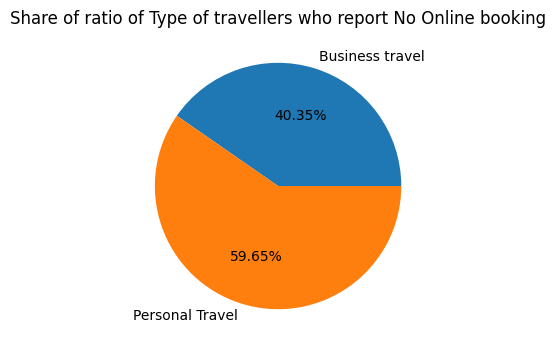

In [61]:
## Online booking service not available by type of travellers

print('Passengers report NO Online booking service')
print('Total','     ',no_online_booking.count()['Ease of Online booking'])
print('-'*25)
print('Ratio of Type of travellers who report No Online booking')
print(round(no_online_booking['Type of Travel'].value_counts()/airlinedata['Type of Travel'].value_counts()*100,2))
print('-'*25)
plt.figure(figsize=(4,4))
plt.pie(x=no_online_booking['Type of Travel'].value_counts()/airlinedata['Type of Travel'].value_counts(), labels=['Business travel','Personal Travel'], autopct='%1.2f%%')
plt.title('Share of ratio of Type of travellers who report No Online booking')
plt.show()

Personal travellers have highest share of ratio of passengers out of total passengers who report No online booking

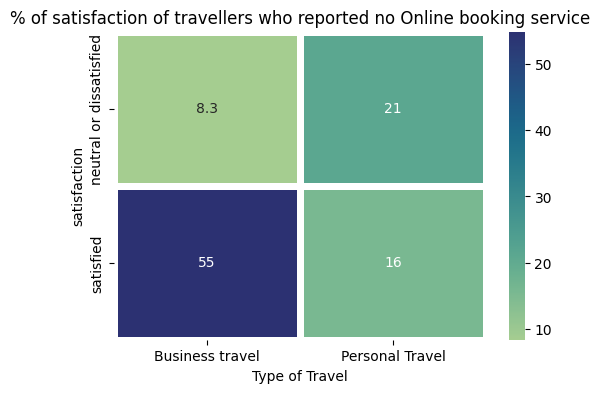

In [62]:
### Pivot table of those Travellers who report no online booking service

pt_no_online_booking=airlinedata[airlinedata['Ease of Online booking']==0].pivot_table(values='Ease of Online booking', index='satisfaction', columns='Type of Travel', aggfunc='count')
pt_no_online_booking=round(pt_no_online_booking/airlinedata[airlinedata['Ease of Online booking']==0]['Ease of Online booking'].count()*100,2)

## Heat map of pt_no_online_booking

plt.figure(figsize=(6,4))
sns.heatmap(data=pt_no_online_booking, annot=True, linewidths=5, cmap='crest')
plt.title('% of satisfaction of travellers who reported no Online booking service')
plt.show()

In case of Business travellers most of them are look satisfied, it may because business travellers booked thier tickets by the contact of agents, hence they do not face any difficulty whether Online booking service is available or not. But In case of Personal travellers scenario is different, here most of them report dissatisfaction, It may have a chance that no online booking service impact on there satisfaction rating.

Passengers report NO Online boarding service
Total       1856
-------------------------
Ratio Type of travellers who report No Online boarding
Type of Travel
Business travel    1.56
Personal Travel    4.07
Name: count, dtype: float64
-------------------------


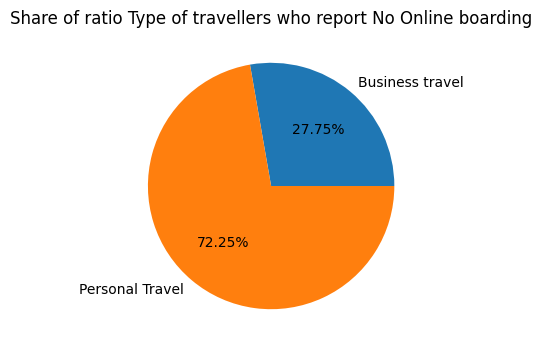

In [63]:
## Online boarding service not available by type of travellers

print('Passengers report NO Online boarding service')
print('Total','     ',no_online_boarding.count()['Online boarding'])
print('-'*25)
print('Ratio Type of travellers who report No Online boarding')
print(round(no_online_boarding['Type of Travel'].value_counts()/airlinedata['Type of Travel'].value_counts()*100,2))
print('-'*25)
plt.figure(figsize=(4,4))
plt.pie(x=no_online_boarding['Type of Travel'].value_counts()/airlinedata['Type of Travel'].value_counts(), labels=['Business travel','Personal Travel'], autopct='%1.2f%%')
plt.title('Share of ratio Type of travellers who report No Online boarding')
plt.show()

Personal travellers have highest share of ratio of passengers who report No online boarding out of total passengers.

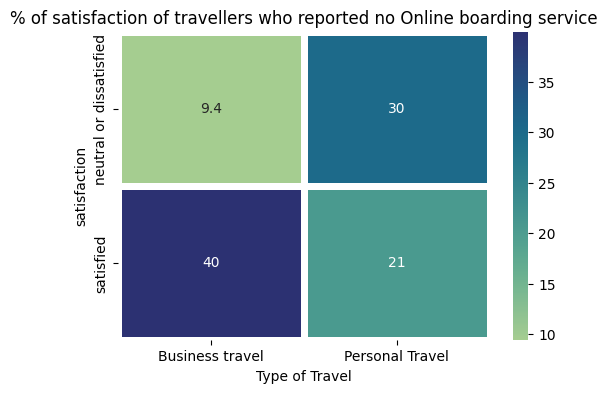

In [64]:
### Pivot table of those Travellers who report no online boarding service

pt_no_online_boarding=airlinedata[airlinedata['Online boarding']==0].pivot_table(values='Online boarding', index='satisfaction', columns='Type of Travel', aggfunc='count')
pt_no_online_boarding=round(pt_no_online_boarding/airlinedata[airlinedata['Online boarding']==0]['Online boarding'].count()*100,2)

## Heat map of pt_no_online_booking

plt.figure(figsize=(6,4))
sns.heatmap(data=pt_no_online_boarding, annot=True, linewidths=5, cmap='crest')
plt.title('% of satisfaction of travellers who reported no Online boarding service')
plt.show()

Unavailablity of online boarding service may effect the satisfaction of personal travellers, but for business travellers it look like they do not have much issue whether the online boarding service available or not.


###Finding 2:

###By the above analysis, Mostly Business class passengers reported no Inflight wifi service, but it may not impact on thier satisfaction decision, similar case in other preferred class.

###In other unavailable services like online booking and online boarding, it look like Personal travellers hold the high chance to get dissatisfied but unavailablity of these serivces.

In [65]:
## Airline Amenities with mode (Most Frequent) of rating equal to 3 or less than 3 ( General )

for i in airlinedata.iloc[:,7:21]:
    if airlinedata[i].mode()[0]<=3:
        print(i,'Most frequent Rating: ',airlinedata[i].mode()[0])
        print('-'*25)

Inflight wifi service Most frequent Rating:  2
-------------------------
Ease of Online booking Most frequent Rating:  3
-------------------------
Gate location Most frequent Rating:  3
-------------------------


In [66]:
airlinedata[['Inflight wifi service', 'Ease of Online booking', 'Gate location']].describe()

,Inflight wifi service,Ease of Online booking,Gate location
count,81696.000000,81696.000000,81696.000000
mean,2.751971,2.772645,2.976816
std,1.346778,1.408303,1.286053
min,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000


Here, Inflight wifi service and Ease of Online booking have mode of rating is 2 and 3 respectively with high standard deviation compare to Gate location with respectively low standard deviation which means rating of gate location is sort of similar with less dispersion between the rating points.

And also gate location is one of those things which regulated by the airport authorities, airlines can not do much about that.
Taking Inflight wifi service and Ease of online booking for further study

Note:- '0' rating in Inflight wifi and Online booking is consider as service not provided.

/tmp/ipython-input-1887419905.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= airlinedata[airlinedata['Inflight wifi service']!=0], x='Inflight wifi service', palette='rocket' )


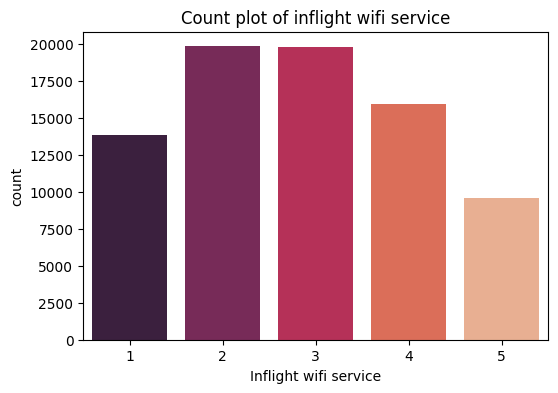

In [67]:
## Count plot of Inflight wifi rating

plt.figure(figsize=(6,4))
sns.countplot(data= airlinedata[airlinedata['Inflight wifi service']!=0], x='Inflight wifi service', palette='rocket' )
plt.title('Count plot of inflight wifi service')
plt.show()

For Inflight wifi service most of the passengers rate below 4.

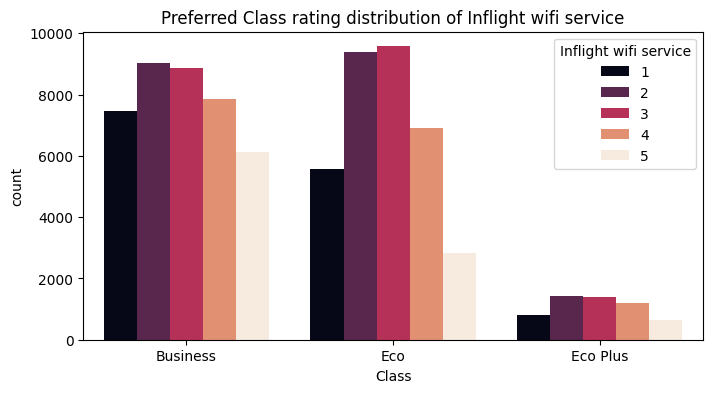

In [68]:
## Which Class give what rating to in flight wifi service

plt.figure(figsize=(8,4))
sns.countplot(data=airlinedata[airlinedata['Inflight wifi service']!=0], hue='Inflight wifi service', x='Class', palette='rocket')
plt.title('Preferred Class rating distribution of Inflight wifi service')
plt.show()

Here, This plot show that Whether it is business class or eco or eco plus mostly of the passengers give 2 and 3 rating, which is not a good rating.

/tmp/ipython-input-3039553926.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= airlinedata[airlinedata['Ease of Online booking']!=0], x='Ease of Online booking', palette='rocket')


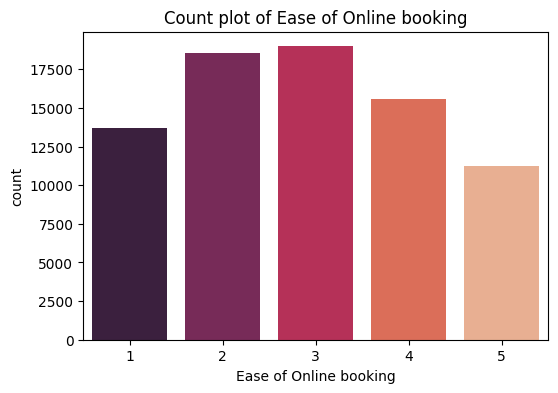

In [69]:
## Count plot of Ease of Online booking rating

plt.figure(figsize=(6,4))
sns.countplot(data= airlinedata[airlinedata['Ease of Online booking']!=0], x='Ease of Online booking', palette='rocket')
plt.title('Count plot of Ease of Online booking')
plt.show()

Similar as Inflight wifi service rating, Ease of online booking have low rating score, mostly below 4.


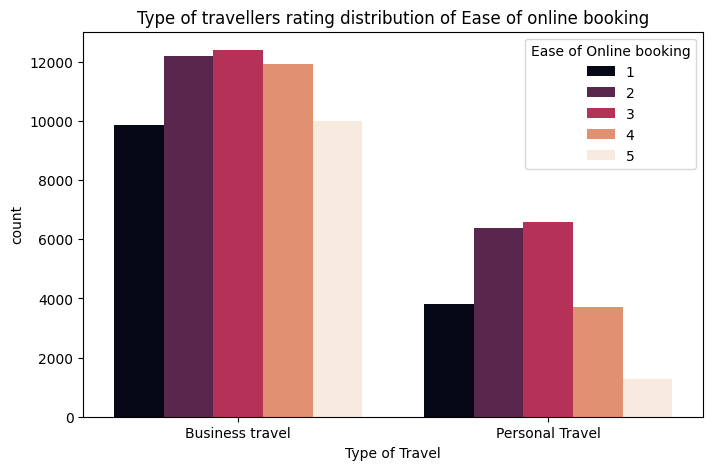

In [70]:
## Which Class give what rating to in flight wifi service

plt.figure(figsize=(8,5))
sns.countplot(data=airlinedata[airlinedata['Ease of Online booking']!=0], hue='Ease of Online booking', x='Type of Travel', palette='rocket')
plt.title('Type of travellers rating distribution of Ease of online booking')
plt.show()

In this plot, Although Business travellers mostly rate 2 and 3 but also there are sort of similar count of business travellers who rate 4, but in case of personal travellers mostly rate 2 and 3 followed by 1 rating which means there is definitely personal travellers face some issue with online booking.


###Finding 3:
### Inflight wifi service is really concerning because all of the preferred class report low rating of 2-3 which is not consider as good rating, also there are many passengers who report no wifi as well in above data analysis, which means at many place wifi service is not available yet and if wifi service is present it is not working well.

### And for online booking it look like business travellers are sort of neutral but personal travellers give low rating of 2 and 3, it may because many business travellers book thier ticket through agencies and personal travellers mostly book by them self.

In [71]:
## Mean rating of particular amenity is small then 3 by Class and type of travellers

print('Mean of Ratings of amenities by class and type of travellers ( any mean of rating smaller than 3)')
print('')
for i in airlinedata.iloc[:,7:21]:
    pt=airlinedata[airlinedata[i]!=0].pivot_table(values=i, index='Class', columns='Type of Travel', aggfunc='mean', margins=True, margins_name='Total')
    if i == 'Gate location':
        continue
    if np.any(pt.values<3):
        print(i)
        print('-'*25)
        print(pt)
        print('='*25)

Mean of Ratings of amenities by class and type of travellers ( any mean of rating smaller than 3)

Inflight wifi service
-------------------------
Type of Travel  Business travel  Personal Travel     Total
Class                                                     
Business               2.911440         2.634459  2.901017
Eco                    2.974476         2.595294  2.769054
Eco Plus               3.184911         2.555466  2.898495
Total                  2.943322         2.593485  2.843618
Departure/Arrival time convenient
-------------------------
Type of Travel  Business travel  Personal Travel     Total
Class                                                     
Business               3.015498         3.782638  3.044169
Eco                    2.932314         3.760052  3.399560
Eco Plus               2.936422         3.752435  3.307323
Total                  2.989635         3.760689  3.213125
Ease of Online booking
-------------------------
Type of Travel  Business travel  Per

After take a view on the above output, there are some amenities to address like : Inlfight wifi service which we already analyse, similarly we analysed online booking and other looks ok but Online boarding for personal travellers seems to be concerning.

In online boarding personal travellers average rating was low.

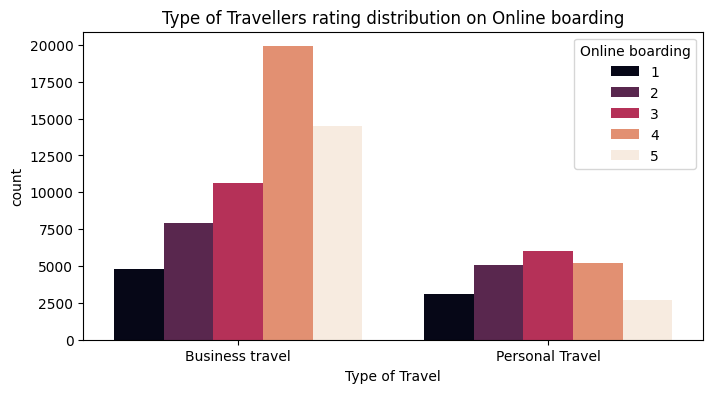

In [72]:
##Travellers rating distribution on Online boarding

plt.figure(figsize=(8,4))
sns.countplot(data=airlinedata[airlinedata['Online boarding']!=0], hue='Online boarding',x='Type of Travel', palette='rocket')
plt.title('Type of Travellers rating distribution on Online boarding')
plt.show()

Here, Business travellers give good rating to online boarding, on the other hand personal travellers give moslty 3 followed by 2 and 4, which is consider as neutral rating.


###Finding 4

###Here, it look like business travellers are sort of positive with online boarding, but personal travellers report sort of neutral rating of 3 followed by 2 and 4. which is consider as ok ok condition of online bording. In above analysis there are also some passengers who report no online boarding which show impact specially on personal travellers. It means first at many place there are no online boarding service, and if it is there then it may not work satisfactory.